In [1]:
#List of dependencies - Use as needed
                #Refer to week 6 notes
        #import requests - Used for APIs
        #from api_key import api_key - file with API key
        #import time - Used for APIs to expand time between each hit
        #import json - Used for APIs
        #import pprint - Formatting for JSON files

        #Refer to week 5 notes
#%matplotlib widget - Allows for multiple instances of same plot
import matplotlib.pyplot as plt # Create plots
import numpy as np # mathematical manipulations
from scipy import stats #- stats and probability

        #Refer to week 4 notes
from pathlib import Path # Link to csv-files
import pandas as pd # Read csv files

Preparing Files: Climate Change

In [2]:
#Link to climate change csv
climate_path = Path("./Resources/Temperature_change_oceania_1960.csv")

# Read the modified Comic Books csv and store into Pandas DataFrame
climate_change = pd.read_csv(climate_path, encoding="latin1")
climate_change.head()

,Area Code,Area Code (M49),Area,Months Code,Months,Element Code,Element,Unit,Y1961,Y1962,...,Y2013,Y2014,Y2015,Y2016,Y2017,Y2018,Y2019,Y2020,Y2021,Y2022
0,5,'016,American Samoa,7001,January,7271,Temperature change,°c,0.624,-0.170,...,0.611,0.636,1.076,1.946,1.796,0.846,1.596,1.296,1.196,1.296
1,5,'016,American Samoa,7001,January,6078,Standard Deviation,°c,0.447,0.447,...,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447,0.447
2,5,'016,American Samoa,7002,February,7271,Temperature change,°c,0.316,-0.050,...,1.251,1.548,1.608,2.688,0.888,1.038,1.588,0.738,0.838,1.038
3,5,'016,American Samoa,7002,February,6078,Standard Deviation,°c,0.505,0.505,...,0.505,0.505,0.505,0.505,0.505,0.505,0.505,0.505,0.505,0.505
4,5,'016,American Samoa,7003,March,7271,Temperature change,°c,-0.762,-0.055,...,1.109,1.269,1.519,1.749,1.899,1.349,1.299,1.699,1.049,1.999


In [3]:
climate_change = climate_change.loc[(climate_change["Area"] == 'Australia') &
                                    (climate_change["Element"] != "Standard Deviation") &
                                    (climate_change["Months"] == 'Meteorological year')]


In [16]:
climate_change_2017 = climate_change.rename(columns= {"Y2016":"2017-18",
                                                 "Y2017":"2018-19",
                                                 "Y2018":"2019-20",
                                                 "Y2019":"2020-21",
                                                 "Y2020":"2021-22",
                                                 "Y2021":"2022-23",
                                                 "Y2022":"2023-24"})

climate_change_new_2017 = climate_change_2017[["2017-18","2018-19","2019-20","2020-21", "2021-22","2022-23", "2023-24"]]
climate_change_new_2017 = climate_change_new_2017.T
climate_change_new_2017 = climate_change_new_2017.rename(columns= {66:"Climate Change Value"})

climate_change_new_2017["Year"] = climate_change_new_2017.index
climate_change_new_2017 = climate_change_new_2017.reset_index(drop=True)
climate_change_new_2017.head()
                                                       


,Climate Change Value,Year
0,1.172,2017-18
1,1.141,2018-19
2,1.129,2019-20
3,1.422,2020-21
4,1.416,2021-22


In [17]:
climate_change_1990 = climate_change.rename(columns= {"Y1990":"1990","Y1991":"1991","Y1992":"1992","Y1993":"1993","Y1994":"1994","Y1995":"1995", "Y1996":"1996", "Y1997":"1997", "Y1998":"1998",          
                                                       "Y1999":"1999","Y2000":"2000","Y2001":"2001","Y2002":"2002","Y2003":"2003","Y2004":"2004","Y2005":"2005","Y2006":"2006","Y2007":"2007",
                                                       "Y2008":"2008","Y2009":"2009","Y2010":"2010","Y2011":"2011","Y2012":"2012","Y2013":"2013","Y2014":"2014","Y2015":"2015","Y2016":"2016",
                                                       "Y2017":"2017","Y2018":"2018","Y2019":"2019","Y2020":"2020",})
                                                       
climate_change_new_1990 = climate_change_1990[["1990","1991","1992","1993","1994","1995","1996","1997","1998","1999","2000", 
                                               "2001", "2002", "2003", "2004", "2005", "2006", "2007", "2008", "2009", "2010",
                                               "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018", "2019", "2020"]]
climate_change_new_1990 = climate_change_new_1990.T
climate_change_new_1990 = climate_change_new_1990.rename(columns= {66:"Climate Change Value"}) 

climate_change_new_1990["Year"] = climate_change_new_1990.index
climate_change_new_1990 = climate_change_new_1990.reset_index(drop=True)
climate_change_new_1990.head()

,Climate Change Value,Year
0,0.549,1990
1,0.820,1991
2,0.281,1992
3,0.484,1993
4,0.221,1994


## State By State wheat production graphs

The following code produces graphs based on each state

In [18]:
# Reading the Wheat_StateByState.csv file
state_df = pd.read_csv("Resources/Wheat_StateByState_formatted.csv")
print(state_df)
year_range = np.arange(1.0,8.0,1.0)
print(year_range)
state_df.head()

      Year  NSW_ha   NSW_kt  VIC_ha  VIC_kt  QLD_ha  QLD_KT   SA_ha   SA_kt  \
0  2017-18  2793.5   4702.8  1446.8  3682.1   639.2   765.4  1975.8  4052.0   
1  2018-19  2382.0   1850.3  1402.9  2276.6   419.7   419.7  1820.8  3024.5   
2  2019-20  2132.0   1772.4  1428.9  3714.3   441.5   418.5  1720.9  2689.1   
3  2020-21  4037.0  12972.2  1413.4  4525.0   966.1  1594.2  1831.0  3982.2   
4  2021-22  3607.7  12029.4  1444.6  4246.4   940.6  2222.4  2008.1  4750.1   
5  2022-23  3600.0  10620.0  1500.0  5392.9   980.0    2600  2200.0  7350.0   
6  2023-24  3300.0   6600.0  1540.4  4618.9   800.0  1 00.0  2200.0  4900.0   

    WA_ha    WA_kt  TAS_ha   TAS_kt  
0  4056.6   7698.6     7.4     40.3  
1  4369.2   9979.2     7.6     40.1  
2  4132.7   5842.2     7.2     43.8  
3  4387.5   8792.7     8.2     56.3  
4  4718.0  12919.1     9.3     70.0  
5  4750.0  14500.0    15.0     82.5  
6  4650.0   8150.0    12.0     85.0  
[1. 2. 3. 4. 5. 6. 7.]


,Year,NSW_ha,NSW_kt,VIC_ha,VIC_kt,QLD_ha,QLD_KT,SA_ha,SA_kt,WA_ha,WA_kt,TAS_ha,TAS_kt
0,2017-18,2793.5,4702.8,1446.8,3682.1,639.2,765.4,1975.8,4052.0,4056.6,7698.6,7.4,40.3
1,2018-19,2382.0,1850.3,1402.9,2276.6,419.7,419.7,1820.8,3024.5,4369.2,9979.2,7.6,40.1
2,2019-20,2132.0,1772.4,1428.9,3714.3,441.5,418.5,1720.9,2689.1,4132.7,5842.2,7.2,43.8
3,2020-21,4037.0,12972.2,1413.4,4525.0,966.1,1594.2,1831.0,3982.2,4387.5,8792.7,8.2,56.3
4,2021-22,3607.7,12029.4,1444.6,4246.4,940.6,2222.4,2008.1,4750.1,4718.0,12919.1,9.3,70.0


NameError: name 'nsw_wheat_prod' is not defined

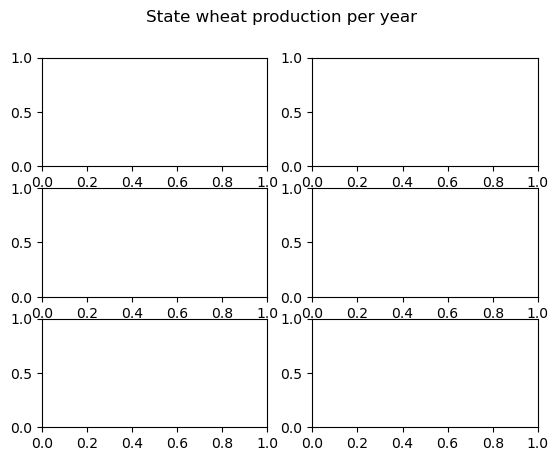

In [11]:
# Creating a multi plot with three rows and two columns
fig, axs = plt.subplots(3, 2)
fig.suptitle('State wheat production per year')

# NSW graph
# Creating a scatter graph with the year as the x value and yield as the y value
axs[0,0].scatter(nsw_wheat_prod['Year'], nsw_wheat_prod['Yield'], c=nsw_wheat_prod['Hectares'], cmap="viridis")
axs[0,0].set_title('NSW wheat prod per year')
axs[0,0].set_ylabel('Yeild')
axs[0,0].set_xlabel('Year')
# NSW linear regression (uncomment the section below once fixed)
# nsw_x_values = year_range
# nsw_y_values = state_df['NSW_kt'].to_numpy() # TODO: The states df seems to be importing the data as a string
# (nsw_slope, nsw_intercept, nsw_rvalue, nsw_pvalue, nsw_stderr) = st.linregress(nsw_x_values, nsw_y_values)
# nsw_regress = year_range * nsw_slope + nsw_intercept
# axs[0,0].plot(year_range,nsw_regress,"r-")

# VIC graph
axs[0,1].scatter(vic_wheat_prod['Year'], vic_wheat_prod['Yield'], c=vic_wheat_prod['Hectares'], cmap="viridis")
axs[0,1].set_title('Vic wheat prod per year')
axs[0,1].set_ylabel('Yeild')
axs[0,1].set_xlabel('Year')

# VIC linear regression
# (vic_slope, vic_intercept, vic_rvalue, vic_pvalue, vic_stderr) = st.linregress(year_range, state_df['VIC_kt'])
# vic_regress = year_range * vic_slope + vic_intercept
# axs[0,0].plot(year_range,vic_regress,"r-")

# QLD graph
axs[1,0].scatter(state_df['Year'], state_df['QLD_kt'], c=state_df['QLD_ha'], cmap="viridis")
axs[1,0].set_title('QLD wheat prod per year')
axs[1,0].set_ylabel('Yeild')
axs[1,0].set_xlabel('Year')

# QLD linear regression (uncomment the section below once fixed)
# (qld_slope, qld_intercept, qld_rvalue, qld_pvalue, qld_stderr) = st.linregress(year_range, state_df['QLD_kt'])
# qld_regress = qld_range * qld_slope + qld_intercept
# axs[0,0].plot(year_range,qld_regress,"r-")

# SA graph
axs[1,1].scatter(state_df['Year'], state_df['SA_kt'], c=state_df['SA_ha'], cmap="viridis")
axs[1,1].set_title('SA wheat prod per year')
axs[2,0].set_ylabel('Yeild')
axs[2,0].set_xlabel('Year')
# SA linear regression (uncomment the section below once fixed)
# (sa_slope, sa_intercept, sa_rvalue, sa_pvalue, sa_stderr) = st.linregress(year_range, state_df['SA_kt'])
# sa_regress = year_range * sa_slope + sa_intercept
# axs[0,0].plot(year_range,sa_regress,"r-")

# WA graph
axs[2,0].scatter(state_df['Year'], state_df['WA_kt'], c=state_df['WA_ha'], cmap="viridis")
axs[2,0].set_title('WA wheat prod per year')
axs[2,0].set_ylabel('Yeild')
axs[2,0].set_xlabel('Year')
# linear regression (uncomment the section below once fixed)
# (wa_slope, wa_intercept, wa_rvalue, wa_pvalue, wa_stderr) = st.linregress(year_range, state_df['WA_kt'])
# wa_regress = year_range * wa_slope + wa_intercept
# axs[0,0].plot(year_range,wa_regress,"r-")

# TAS graph
axs[2,1].scatter(state_df['Year'], state_df['TAS_kt'], c=state_df['TAS_ha'], cmap="viridis")
(tas_slope, tas_intercept, tas_rvalue, tas_pvalue, tas_stderr) = st.linregress(year_range, state_df['TAS_kt'])
tas_regress = year_range * tas_slope + tas_intercept
axs[0,0].plot(year_range,tas_regress,"r-")
axs[2,1].set_title('TAS wheat prod per year')
axs[2,1].set_ylabel('Yeild')
axs[2,1].set_xlabel('Year')
# linear regression (uncomment the section below once fixed)